# 2022 Kenyan General Elections Through Tweets

## An NLP project-approach

Kenya, an East African country, will be conducting a general elections this year- August 9th, 2022. This mini project aims to understand the Kenyan people sentiments on elections-related topics with the goal of getting an insight in which presidential candidate is highly favoured and likely to clinch victory.

Summary on Kenya Demographic:
https://dhsprogram.com/pubs/pdf/OD71/OD71.pdf


Data is acquired from Twitter, a social platform that has gained popularit by masses in Kenya (.. and globally), by web-scrapping using `Twint library`.
    

- Data (Tweets) limit set to `5 million tweets`. 
    
##### Scrapping Library Choice Summary: 
- Twint has unlimited scrapping capability unlike proprietary Twitter API `Tweepy` that requires API request and developer account. Tweepy API limit scrapping to only 3200 tweets.

- In this mini project, I will utelize Twint scrapping tool.

In [1]:
# Import twint API
import twint

# asynchronous runtime import (allows run untill complete before returning results)
import nest_asyncio
nest_asyncio.apply()

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import json
import string

# NLP imports
from nltk import (sent_tokenize, word_tokenize)
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

from wordcloud import WordCloud

# Set default plt size
plt.rcParams['figure.figsize'] = (13.0, 9.0)

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# Datetime import
import datetime


In [2]:
# Configure object


def get_kenya_elections_tweets(use_cache = True):
    
    raw_tweets =  'kenyan_2022_elections_sentiments.csv'
    
    if os.path.exists(raw_tweets) and use_cache:
        
        print('Reading local csv file..')
        
        return pd.read_csv(raw_tweets)
    else: 
        current_date = datetime.datetime.now()
        current_end_date = current_date + datetime.timedelta(days=1)
        
        config = twint.Config()
        config.Search = ["kenya elections 2022"] 
        config.Lang = "en"
        config.Limit = 5_000_000
        config.Store_csv = True
        config.Output = raw_tweets
        print('Running search...')
        twint.run.Search(config)
        
        config.Since = current_date.strftime("%Y-%m-%d")
        config.Until = current_end_date.strftime("%Y-%m-%d")
        current_date = current_end_date
        current_end_date += datetime.timedelta(days=1)
        return pd.read_csv(raw_tweets)

### Read Tweets

In [3]:
# Get tweets and save in csv format
tweets = get_kenya_elections_tweets()

Running search...
1552389241648205826 2022-07-27 15:23:31 -0500 <KamauIET> Muumba, tunakuja mbele yako tena kuhusu #Kenya kwa sababu baada ya siku chache, kutakuwa na uchaguzi. Tunaomba #Amani, na #Rais aliyepakwa mafuta na wewe. Rais anayeweza kutunza #Wakenya na kuiondoa Kenya kwenye madeni. Thank you Jesus. #KenyaKwanza #KenyaElections2022 #Kenyans🇰🇪
1552367818762375168 2022-07-27 13:58:24 -0500 <JustNowOne> KEPROBA launches peace campaigns ahead of 2022 general elections - Capital FM Kenya  https://t.co/V6PWHdecOy SignUp HiPeople  https://t.co/TqK4uUpHdq
1552366314479652864 2022-07-27 13:52:25 -0500 <EntMinda> #kenyaelections2022 #KenyaDecides  https://t.co/k232W5hp0J
1552357408613306368 2022-07-27 13:17:02 -0500 <CIHABlog> Reflections on the 2022 General Elections in Kenya: What is at Stake? (zoom webinar) -  https://t.co/dcqoVyhnv1
1552356046945099784 2022-07-27 13:11:37 -0500 <wecare518> Peace engagement forum hosted by Kisumu Peace and Justice Center. We joined African Students

1551997639226531841 2022-07-26 13:27:26 -0500 <The_we_Kenya> INTERVIEWERS TURNING INTERROGATOR. Was interrogation the Debate?@KTNNewsKE @NationAfrica Too much into personal life rather than Issues of 2022 elections. #PresidentialDebate2022
1551993656403443714 2022-07-26 13:11:36 -0500 <tbayissa> Oromo is the largest ethnic group in Africa. Borna Oromo elections campaign in Kenya 2022. Oromos are much respected in Kenya.  https://t.co/OrqZIHntBl
1551985389983916036 2022-07-26 12:38:46 -0500 <Mukamba19377975> Kenya might have a live televised presidential candidates debate in the August 2022 elections......why can't we have ours?just wrong answers are acceptable
1551985073620226048 2022-07-26 12:37:30 -0500 <ObamaMalik> Kenya: Presidential Debate 2022. They have started their games. NO POWER (ELECTRICITY)! Shutting down the only participant Deputy President William Ruto who is competing against the government. They do this elections in elections out folks.
1551978568548237312 2022-07-26 

1551807557618077697 2022-07-26 00:52:07 -0500 <MwangoCapital> 10. Data from the Kenya Motor Industry Association shows dealers moved 6,492 units in H1 2022, up 3.9% from 6,246 units a year earlier.  The marginal growth is attributed to the wait-and-see posture by customers ahead of the General Elections.  [@BD_Africa]  https://t.co/jTpaHCIZCG
1551807526492160001 2022-07-26 00:52:00 -0500 <moneyinafrica> African stock markets on 25th July 2022  Mixed day across the continent, largest markets of South Africa, Nigeria and Egypt had significant falls while Kenya had a positive rise - nice to see as elections come round the corner  https://t.co/cW3AOSLLgz
1551804534376353793 2022-07-26 00:40:06 -0500 <David1Mutai> Well done Chebukati! Focus on the job; these fellows derailing you will face the wrath of Kenyans after the elections. God bless you &amp; your team as you help Kenya hold a free and credible 2022 General Election. @IEBCKenya @DCI_Kenya @wafuchebukati @StateHouseKenya @citizentvke

1551553581349801984 2022-07-25 08:02:54 -0500 <RonnieSnr1> @IEBCKenya @IEBCKenya officials, both the commission and the secretariat should b made to understand that SHOULS they bungle the elections slated for 9/8/2022, Kenyans will go after them and their families home and abroad. @DCI_Kenya, @IG_NPS @NPSOfficial_KE and @StateHouseKenya TAKE NOTE.
1551551362021949442 2022-07-25 07:54:05 -0500 <Procmura_prica> PROCMURA has launched a peace campaign, dubbed #ChaiNaAmani aimed at educating and sensitizing the public on the need and importance of maintaining peace ahead of, during, and after the General Elections in Kenya come August 9, 2022.  #ElectionsBilaNoma #PeacefulElections2022  https://t.co/98WRV4exdB
1551547528897646593 2022-07-25 07:38:51 -0500 <komeshaufisadi1> EACC TO INVESTIGATE KSHS.100MN WEALTH HELD BY A RURAL ROAD AGENCY’S ACCOUNTANT  https://t.co/6Kxz1IyGiT @EACCKenya @ODPP_KE @DCI_Kenya #kenyaelections2022 #PresidentialDebatesKe2022 #sonko #DCI #dci2022 #Elections2022 #Az

1551257295446753281 2022-07-24 12:25:34 -0500 <NdakaMutisya> Kenya’s 2022 Elections: Is the past a prelude? Looks we never learned?  @johnallannamu  https://t.co/zGRz1s7JUT
1551253243199635457 2022-07-24 12:09:28 -0500 <kitekimichael> #kenyaelections2022   #Kenya election is about two weeks time.  Do you have faith in IEBC &amp; it's chairman?  JKIA| uhuru| #RailaOdinga |#AzimioLaMtKenya| Kinoti |ATPU |Smartmatic| Wajackoyah |Kivuitu |#PresidentialElections2022| #Mwaure |Tharaka Nithi |Rigging| raid | Ruto| KIEMS
1551246974963400705 2022-07-24 11:44:34 -0500 <KiioMutua5> @kot @KenyansOnTwitta @Kotsocha_ke #Inawezekana #Kenya #kenyaelections2022   https://t.co/7xHpvlb8YJ
1551244972111921152 2022-07-24 11:36:36 -0500 <Kiprotich0_0> Sema azimio uone ?? 🗡️🗡️🗡️🗡️🗡️🗡️🗡️ #KeaDrive #kenya #kenyansdata #kenyaelections2022  https://t.co/F3PBu5jCQD
1551237965195759616 2022-07-24 11:08:46 -0500 <Dystopian2022> During the last elections, ODM offices were raided and @WilliamsRuto said nothing. Norma

1551149319780274176 2022-07-24 05:16:31 -0500 <DorothyAttema> #KOT #kot #KenyansPoll #Kenya #kenyaelections2022 #KenyanTraffic #kenyadecides  https://t.co/6H7DRfdHpV
1551147717996445696 2022-07-24 05:10:09 -0500 <LoveGalandi> KENYA ELECTIONS 2022: Why All East African Countries Must Closely Watch ...  https://t.co/8OtHRJU4Wl via @YouTube
1551146530651897857 2022-07-24 05:05:26 -0500 <odongot_o> @DCIO,Arrest Chebukati and all the perpetrators of the rigging plan,let's postpone the elections.We cant afford more blood shed in Kenya because of the corrupt individual at the IEBC headed by Chebukati.We demand  free and fair elections 2022.
1551145383648268288 2022-07-24 05:00:53 -0500 <DanOjowa> Chebukati is Ruto's direct agent. He can't be trusted to deliver a transparent election.  #FederalStatesofAfrica #kenyaelections2022
1551141864668966912 2022-07-24 04:46:54 -0500 <radio_punchline> What advice would you give IEBC Chairperson Wafula Chebukati?   #kenyaelections2022  https://t.co/mMW5EJ

1551075602949718016 2022-07-24 00:23:35 -0500 <tol_4951> Details by @DCI_Kenya about the arrest of the Venezuelans at JKIA. Chebukati should come out clear on everything and not just rush to publish press releases. IEBC has promised credible elections 2022 &amp; they should be committed to just that without leaving anything to chance.
1551063496565178368 2022-07-23 23:35:29 -0500 <PhilipOkal1> @DCI_Kenya Shame on you @OleItumbi @kithurekindiki_ @WilliamsRuto @rigathi @IEBCKenya @MusaliaMudavadi and all UDA leaders, to always speak for @IEBCKenya yet they cajole with people whom there intentions is to rig 2022 elections and burn our country.
1551047206135889921 2022-07-23 22:30:45 -0500 <yusufmagan> @MutahiNgunyi IEBC failed 2013/7 which gave us tyranny we live.. Raila=Ruto=Uhuru=Kibaki=Karua=BBI=all Bomas Draft killers...2022 elections are a DOA (dead on  arrival) ...cant cure Kenya because the 2010 Kenyan constitution is not  Wanjiku product(ORENGO told us so at appeal court  on  bbi)

In [4]:
# Review dataframe
tweets[:3]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1552389241648205826,1552384303434121221,2022-07-27 15:23:31 CDT,2022-07-27,15:23:31,-500,1046548833524563968,kamauiet,KamauIET; Intercultural Education & Training🇨🇦🇰,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1552367818762375168,1552367818762375168,2022-07-27 13:58:24 CDT,2022-07-27,13:58:24,-500,1506620226162634758,justnowone,JustNow! 🇮🇹,"{'type': 'Point', 'coordinates': [-1.30921686,...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1552366314479652864,1552366314479652864,2022-07-27 13:52:25 CDT,2022-07-27,13:52:25,-500,1552242339594248192,entminda,MINDA ENT,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
# Make copy of dataframe 
df = tweets.copy()

In [6]:
# Unique tweets usernames
df.username.nunique()

186

### Check for Nulls

In [7]:
missing_data_percent = df.isnull().sum() * 100 / len(df)
missing_data_percent

id                   0.000000
conversation_id      0.000000
created_at           0.000000
date                 0.000000
time                 0.000000
timezone             0.000000
user_id              0.000000
username             0.000000
name                 0.000000
place               99.152542
tweet                0.000000
language             0.000000
mentions             0.000000
urls                 0.000000
photos               0.000000
replies_count        0.000000
retweets_count       0.000000
likes_count          0.000000
hashtags             0.000000
cashtags             0.000000
link                 0.000000
retweet              0.000000
quote_url           92.796610
video                0.000000
thumbnail           65.254237
near               100.000000
geo                100.000000
source             100.000000
user_rt_id         100.000000
user_rt            100.000000
retweet_id         100.000000
reply_to             0.000000
retweet_date       100.000000
translate 

### Drop Nulls and Unnecessary Columns

In [8]:
cols_to_drop = ['place', 'quote_url','thumbnail', 
                'near','geo','source', 'user_rt_id', 
                'user_rt','retweet_id', 'retweet_date',
                'trans_src', 'trans_dest', 'translate',
               'cashtags', 'reply_to', 'retweet', 'created_at',
               'id']

df = df.drop(columns = cols_to_drop)

### Create month and days columns 

Twitter time range is from Jul 23rd, 2022 to Jul 27, 2022

In [9]:
# Get twitter time frame
df.date.min(), df.date.max() 

('2022-07-23', '2022-07-27')

In [10]:
df.date.dtype

dtype('O')

In [11]:
# Convert date col to datetime and do feature engineering
df['date'] = pd.to_datetime(df.date)
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

### Data Preparation Notes:

- Dropping columns with missing values over 90%. 
- Thumbnail contains twitter image links and will drop the columns as non-essential information.
- Scrapping limited langauge to english but other languages (not including swahili which is widely spoken in Kenya) still permeated. 

#### Data Limitations
- Dataframe has no retweet to tweets
- Although limit set to 5 million scrapped tweets,  datapoints results in 277 minimal unique usernames. (Possible multiple tweets from same accounts)
- Language filter possibly in-effctive in limiting language

In [12]:
# Language Check
df.language.unique()

array(['in', 'en', 'qme', 'fr', 'ca', 'tl', 'ht', 'es', 'it', 'qht'],
      dtype=object)

In [13]:
# DataFrame
df.head()

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
0,1552384303434121221,2022-07-27,15:23:31,-500,1046548833524563968,kamauiet,KamauIET; Intercultural Education & Training🇨🇦🇰,"Muumba, tunakuja mbele yako tena kuhusu #Kenya...",in,[],[],[],0,0,0,"['kenya', 'amani', 'rais', 'wakenya', 'kenyakw...",https://twitter.com/KamauIET/status/1552389241...,0,7,27
1,1552367818762375168,2022-07-27,13:58:24,-500,1506620226162634758,justnowone,JustNow! 🇮🇹,KEPROBA launches peace campaigns ahead of 2022...,en,[],['http://lasthour.hipeople.biz/SVc4D4'],['https://pbs.twimg.com/media/FYseTgaakAA6VEx....,0,0,0,[],https://twitter.com/JustNowOne/status/15523678...,1,7,27
2,1552366314479652864,2022-07-27,13:52:25,-500,1552242339594248192,entminda,MINDA ENT,#kenyaelections2022 #KenyaDecides https://t.c...,qme,[],[],['https://pbs.twimg.com/media/FYsc70zaUAI4nWu....,0,0,0,"['kenyaelections2022', 'kenyadecides']",https://twitter.com/EntMinda/status/1552366314...,1,7,27
3,1552357408613306368,2022-07-27,13:17:02,-500,520796956,cihablog,CIHA,Reflections on the 2022 General Elections in K...,en,[],['http://ow.ly/kE8Q50K5J7m'],[],0,0,1,[],https://twitter.com/CIHABlog/status/1552357408...,0,7,27
4,1552356046945099784,2022-07-27,13:11:37,-500,1429538180567601157,wecare518,Wecare,Peace engagement forum hosted by Kisumu Peace ...,en,[],[],['https://pbs.twimg.com/media/FYsTlYZXkAYm69Z....,0,1,2,[],https://twitter.com/wecare518/status/155235604...,1,7,27


### Further Cleaning with Rejex 

In [14]:
# Strip any characters from tweets other than number, single white space, or comma and letters from tweets column

df[['tweet']].replace("[^0-9a-zA-Z'\s]",'', regex=True, inplace = True)
df.head()

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
0,1552384303434121221,2022-07-27,15:23:31,-500,1046548833524563968,kamauiet,KamauIET; Intercultural Education & Training🇨🇦🇰,"Muumba, tunakuja mbele yako tena kuhusu #Kenya...",in,[],[],[],0,0,0,"['kenya', 'amani', 'rais', 'wakenya', 'kenyakw...",https://twitter.com/KamauIET/status/1552389241...,0,7,27
1,1552367818762375168,2022-07-27,13:58:24,-500,1506620226162634758,justnowone,JustNow! 🇮🇹,KEPROBA launches peace campaigns ahead of 2022...,en,[],['http://lasthour.hipeople.biz/SVc4D4'],['https://pbs.twimg.com/media/FYseTgaakAA6VEx....,0,0,0,[],https://twitter.com/JustNowOne/status/15523678...,1,7,27
2,1552366314479652864,2022-07-27,13:52:25,-500,1552242339594248192,entminda,MINDA ENT,#kenyaelections2022 #KenyaDecides https://t.c...,qme,[],[],['https://pbs.twimg.com/media/FYsc70zaUAI4nWu....,0,0,0,"['kenyaelections2022', 'kenyadecides']",https://twitter.com/EntMinda/status/1552366314...,1,7,27
3,1552357408613306368,2022-07-27,13:17:02,-500,520796956,cihablog,CIHA,Reflections on the 2022 General Elections in K...,en,[],['http://ow.ly/kE8Q50K5J7m'],[],0,0,1,[],https://twitter.com/CIHABlog/status/1552357408...,0,7,27
4,1552356046945099784,2022-07-27,13:11:37,-500,1429538180567601157,wecare518,Wecare,Peace engagement forum hosted by Kisumu Peace ...,en,[],[],['https://pbs.twimg.com/media/FYsTlYZXkAYm69Z....,0,1,2,[],https://twitter.com/wecare518/status/155235604...,1,7,27


## Exploration

### Univariate Features

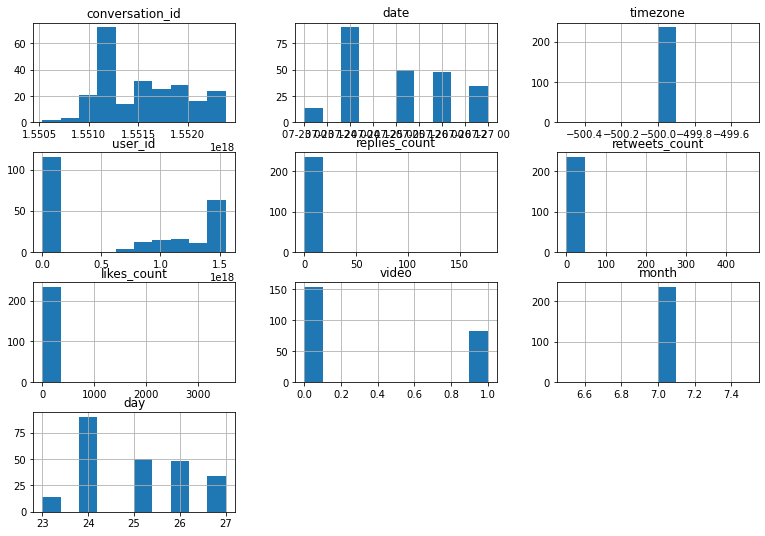

In [15]:
# Non-categorical data
df.hist(bins = 10)
plt.show()

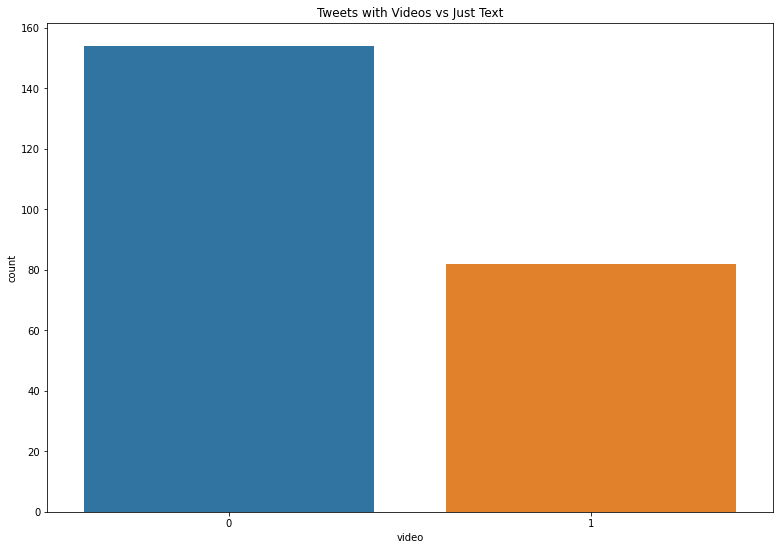

In [16]:
# Tweets with videos
sns.countplot('video', data = df)
plt.title('Tweets with Videos vs Just Text')
plt.show()

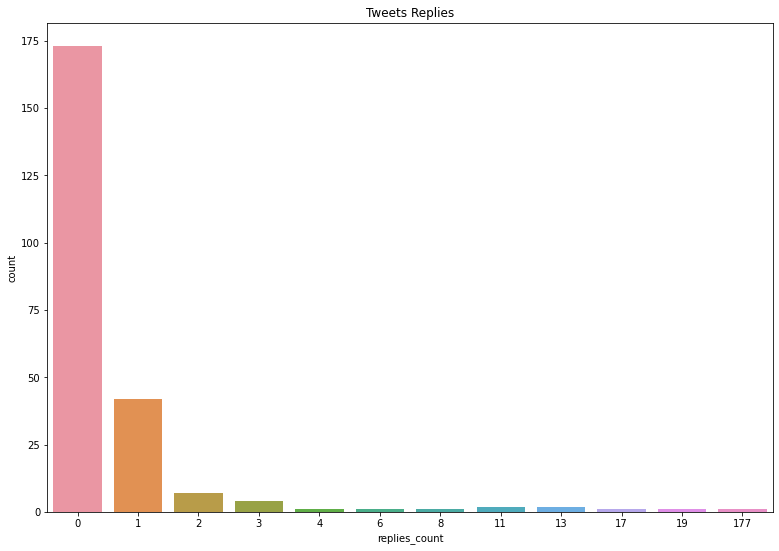

In [17]:
# Tweets with videos
sns.countplot('replies_count', data = df)
plt.title('Tweets Replies')
plt.show()

In [18]:
# Conventionally, more replies imply topic of interest
df.replies_count.value_counts()

0      173
1       42
2        7
3        4
11       2
13       2
177      1
19       1
6        1
8        1
4        1
17       1
Name: replies_count, dtype: int64

In [19]:
# Examine tweet with more than 10 replies
replies_over_10 = df[df.replies_count > 10]
replies_over_10

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
19,1552236166132518912,2022-07-27,05:15:15,-500,1167756273569402880,wachera__,Ruth Wachera,General elections are scheduled to be held in ...,en,[],[],['https://pbs.twimg.com/media/FYqmkQpXEAEiiuy....,11,10,7,['researchcountypoll'],https://twitter.com/Wachera__/status/155223616...,1,7,27
41,1552042012479819779,2022-07-26,16:23:45,-500,407781903,migunamiguna,Dr. Miguna Miguna,PREDICTION: Election will be held largely peac...,en,"[{'screen_name': 'williamsruto', 'name': 'will...",[],[],177,460,3527,['lindakura'],https://twitter.com/MigunaMiguna/status/155204...,0,7,26
48,1551993656403443714,2022-07-26,13:11:36,-500,18710290,tbayissa,Talille_Bongase,Oromo is the largest ethnic group in Africa. B...,en,[],[],[],19,32,110,[],https://twitter.com/tbayissa/status/1551993656...,1,7,26
63,1551892256659046401,2022-07-26,06:28:41,-500,97443520,undpkenya,UNDP Kenya,The press conference by @Uwiano_Peace platform...,en,"[{'screen_name': 'uwiano_peace', 'name': 'uwia...",[],['https://pbs.twimg.com/media/FYltxC9WIAANJeB....,11,41,47,"['electionsbilanoma', 'letpeacewin']",https://twitter.com/UNDPKenya/status/155189225...,1,7,26
152,1551218257025196032,2022-07-24,09:50:27,-500,1459194143729758209,railatosha2022,Azimio La Umoja One Kenya,Now now now. Why is RUTO wailing more than the...,en,[],[],[],13,16,122,[],https://twitter.com/RailaTosha2022/status/1551...,0,7,24
219,1551084368063565826,2022-07-24,00:58:25,-500,2341763551,makauwamuli,Makau F. Muli 🇰🇪,It seems we have two bodies managing August 20...,en,[],[],[],13,46,368,[],https://twitter.com/MakauWaMuli/status/1551084...,0,7,24
227,1550937827147489280,2022-07-23,15:16:07,-500,1459194143729758209,railatosha2022,Azimio La Umoja One Kenya,Deported back to Venezuela. I think that the I...,en,"[{'screen_name': 'setholale', 'name': 'seth ol...",[],['https://pbs.twimg.com/media/FYYJoqsXEAEjU16....,17,19,163,[],https://twitter.com/RailaTosha2022/status/1550...,1,7,23


In [72]:
# Tweet
print(replies_over_10.tweet.unique())

['General elections\xa0are scheduled to be held in\xa0Kenya\xa0on 9 August 2022. Voters will elect the\xa0President, members of the\xa0National Assembly\xa0and\xa0Senate, county governors and members of the 47 county assemblies.   #ResearchCountyPoll  https://t.co/mv7eEdBdRy'
 'PREDICTION: Election will be held largely peacefully on 9 August 2022. Despot Uhuru Kenyatta will send ARMED goons to disrupt elections, switch off power in Rift Valley, Mt. Kenya and Nairobi. He will refuse to hand over power to @WilliamsRuto. #LindaKura. Prepare for RESISTANCE!'
 'Oromo is the largest ethnic group in Africa. Borna Oromo elections campaign in Kenya 2022. Oromos are much respected in Kenya.  https://t.co/OrqZIHntBl'
 "The press conference by @Uwiano_Peace platform members on the 'State of Peace &amp; Political Decency in the Run Up to 2022 General Elections', reiterated that Kenyans should report any cases of incitement &amp; ensure peace within their locality. #ElectionsBilaNoma #LetPeaceWin  h

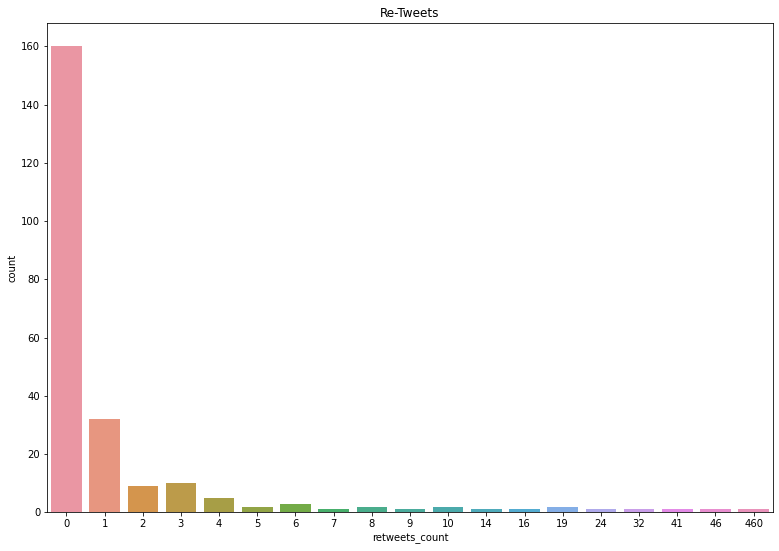

In [21]:
# Tweets with videos
sns.countplot('retweets_count', data = df)
plt.title('Re-Tweets')
plt.show()

In [49]:
# Like replies, examine re-tweets
df.retweets_count.value_counts()

0      160
1       32
3       10
2        9
4        5
6        3
10       2
19       2
8        2
5        2
9        1
46       1
16       1
24       1
14       1
41       1
32       1
460      1
7        1
Name: retweets_count, dtype: int64

In [61]:
# Re-tweets Greater than 100 
retweet_over_10_times = df[df.retweets_count > 10 ]
retweet_over_10_times

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
32,1552158670342979585,2022-07-27,00:07:19,-500,2444362211,ciira_cyrus,Ciira C.,"may go well us kenya , let ' #jamhurisportsgro...",en,[],[],['https://pbs.twimg.com/media/FYpgE5yXoAAg34S....,3,19,36,['jamhurisportsground'],https://twitter.com/ciira_cyrus/status/1552158...,1,7,27
41,1552042012479819779,2022-07-26,16:23:45,-500,407781903,migunamiguna,Dr. Miguna Miguna,prediction : election held largely peacefully ...,en,"[{'screen_name': 'williamsruto', 'name': 'will...",[],[],177,460,3527,['lindakura'],https://twitter.com/MigunaMiguna/status/155204...,0,7,26
48,1551993656403443714,2022-07-26,13:11:36,-500,18710290,tbayissa,Talille_Bongase,oromo largest ethnic group africa. borna oromo...,en,[],[],[],19,32,110,[],https://twitter.com/tbayissa/status/1551993656...,1,7,26
50,1551985073620226048,2022-07-26,12:37:30,-500,324236072,obamamalik,Malik Obama,kenya : presidential debate 2022. started game...,en,[],[],[],6,24,72,[],https://twitter.com/ObamaMalik/status/15519850...,0,7,26
63,1551892256659046401,2022-07-26,06:28:41,-500,97443520,undpkenya,UNDP Kenya,press conference @uwiano_peace platform member...,en,"[{'screen_name': 'uwiano_peace', 'name': 'uwia...",[],['https://pbs.twimg.com/media/FYltxC9WIAANJeB....,11,41,47,"['electionsbilanoma', 'letpeacewin']",https://twitter.com/UNDPKenya/status/155189225...,1,7,26
67,1551878916041805824,2022-07-26,05:35:40,-500,1562505374,irck_info,Inter-Religious Council of Kenya(IRCK),.@irck_info inter-religious council kenya join...,en,"[{'screen_name': 'irck_info', 'name': 'inter-r...",[],['https://pbs.twimg.com/media/FYlhaqfWAAEVZ6H....,1,14,24,['letpeacewin'],https://twitter.com/irck_info/status/155187891...,1,7,26
152,1551218257025196032,2022-07-24,09:50:27,-500,1459194143729758209,railatosha2022,Azimio La Umoja One Kenya,now. ruto wailing iebc chebukati. asking secur...,en,[],[],[],13,16,122,[],https://twitter.com/RailaTosha2022/status/1551...,0,7,24
219,1551084368063565826,2022-07-24,00:58:25,-500,2341763551,makauwamuli,Makau F. Muli 🇰🇪,seems two bodies managing august 2022 election...,en,[],[],[],13,46,368,[],https://twitter.com/MakauWaMuli/status/1551084...,0,7,24
227,1550937827147489280,2022-07-23,15:16:07,-500,1459194143729758209,railatosha2022,Azimio La Umoja One Kenya,deported back venezuela. think iebc chebukati ...,en,"[{'screen_name': 'setholale', 'name': 'seth ol...",[],['https://pbs.twimg.com/media/FYYJoqsXEAEjU16....,17,19,163,[],https://twitter.com/RailaTosha2022/status/1550...,1,7,23


In [62]:
# Message
retweet_over_10_times.tweet

32     may go well us kenya , let ' #jamhurisportsgro...
41     prediction : election held largely peacefully ...
48     oromo largest ethnic group africa. borna oromo...
50     kenya : presidential debate 2022. started game...
63     press conference @uwiano_peace platform member...
67     .@irck_info inter-religious council kenya join...
152    now. ruto wailing iebc chebukati. asking secur...
219    seems two bodies managing august 2022 election...
227    deported back venezuela. think iebc chebukati ...
Name: tweet, dtype: object

### Bivariate Features

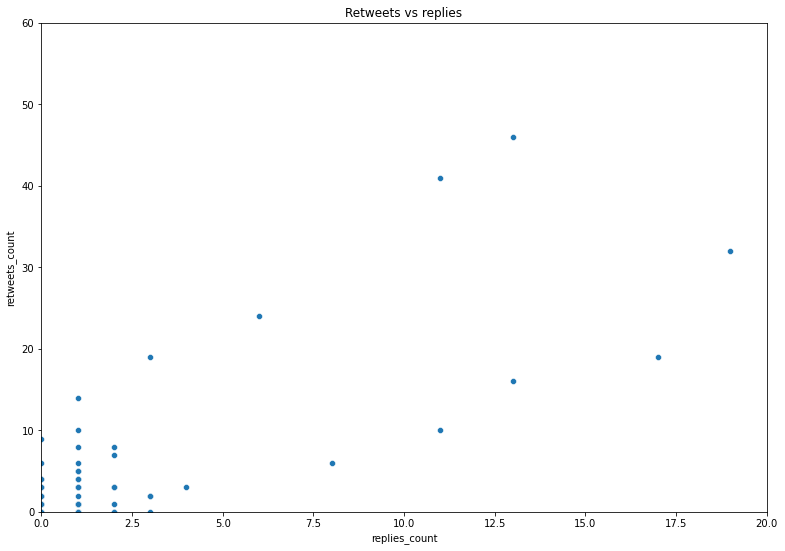

In [55]:
# Retweets with videos

sns.scatterplot(data = df, y = 'retweets_count', x = 'replies_count')
plt.xlim(0, 20)
plt.ylim(0, 60)
plt.title('Retweets vs replies')


None

### Multi-variate Features

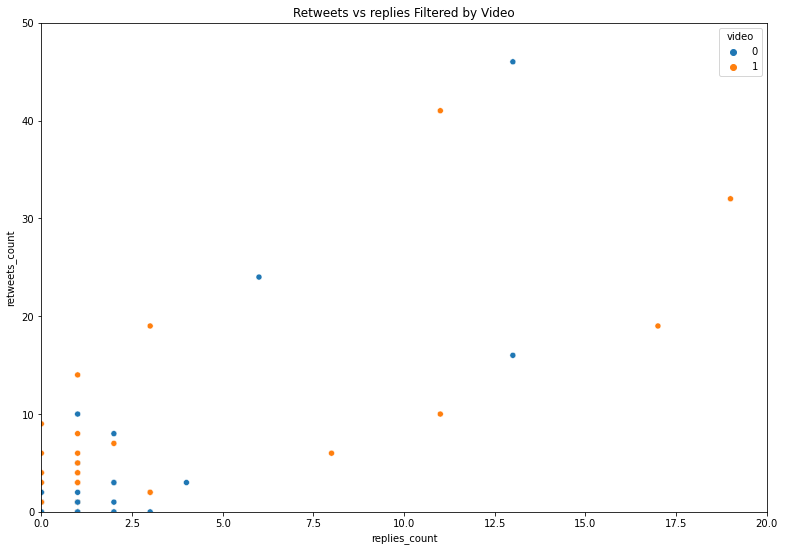

In [26]:
# Retweets vs replies with videos

sns.scatterplot(data = df, y = 'retweets_count', x = 'replies_count', hue = 'video')
plt.xlim(0, 20)
plt.ylim(0, 50)
plt.title('Retweets vs replies Filtered by Video')

None

For purpose of time, this mini-project will limit visual exploration for future discoveries

### Tokenize Words

Break words and any punctuation left over into discrete units.

In [27]:
def tokenize_tweets(text):
    
    tokenizer = ToktokTokenizer()
    
    return tokenizer.tokenize(text, return_str = True)
    
df['tweet'] = df['tweet'].apply (lambda x: tokenize_tweets(x.lower()))

### Remove Stopwords

Stop words dont add any value to our analysis, hence no need/ Stipped.

In [28]:
stop_words = stopwords.words('english')


df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

### Stemming/ Lemmatize

In [29]:
def stemmer(text):
    
    ps = PorterStemmer()
    
    return ps.stem(text)

def lemmatize(text):
    
    wnl = WordNetLemmatizer()
    
    return wnl.lemmatize(text)

df['tweet'] = df['tweet'].apply(lambda x: stemmer(x))
df['tweet'] = df['tweet'].apply(lambda x: lemmatize(x))

### Word Count

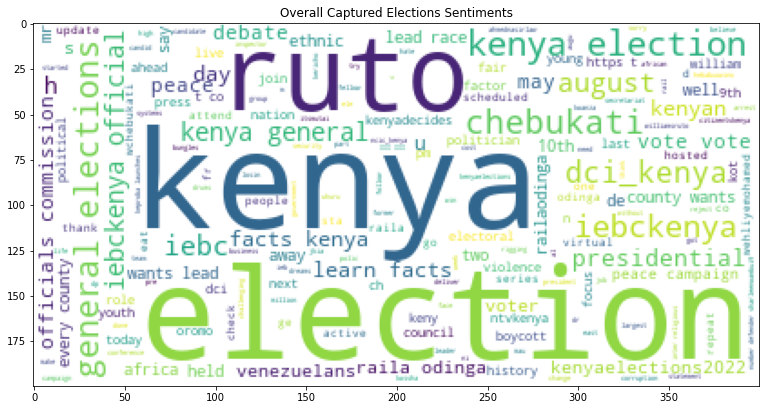

In [34]:
# Convert tweets to string
tweets_list = df.loc[:, 'tweet'].to_string()

# Generate WordCloud
img = WordCloud(background_color='white').generate(tweets_list)
plt.imshow(img)
plt.title('Overall Captured Elections Sentiments')
plt.show()

### Word Cloud with 10+ Replies (Can be infered most instested sentiments)

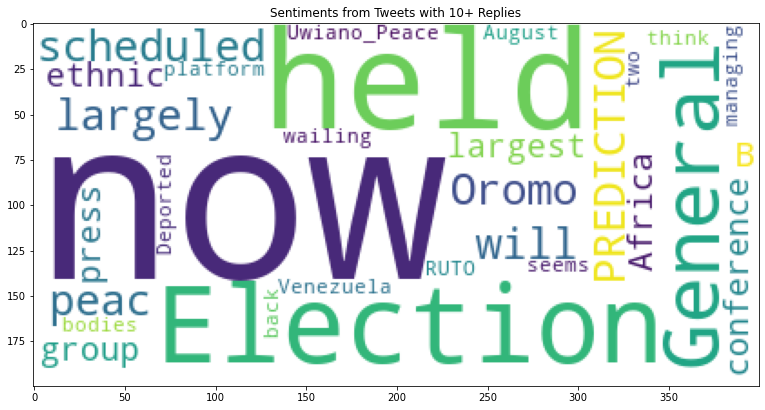

In [76]:
# Convert tweets to string
tweets_list = replies_over_10.loc[:, 'tweet'].to_string()

# Generate WordCloud
img = WordCloud(background_color='white').generate(tweets_list)
plt.imshow(img)
plt.title('Sentiments from Tweets with 10+ Replies')
plt.show()

### Tweets with Retweets over 10 Times

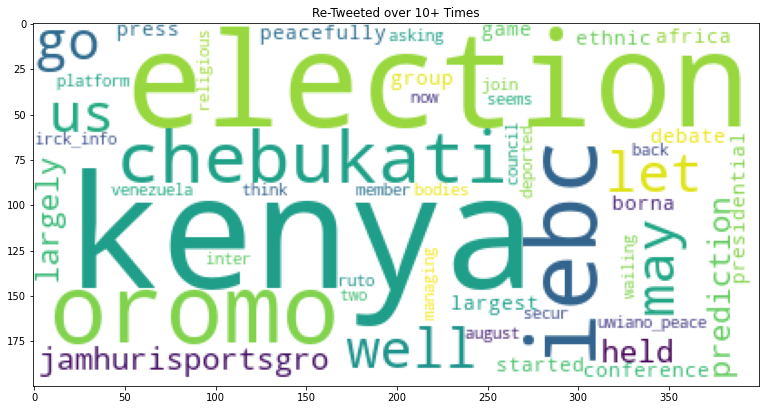

In [77]:
# Convert tweets to string
tweets_list = retweet_over_10_times.loc[:, 'tweet'].to_string()

# Generate WordCloud
img = WordCloud(background_color='white').generate(tweets_list)
plt.imshow(img)
plt.title('Re-Tweeted over 10+ Times')
plt.show()

## Project on-going and current as of July 27, 2022
- Improvements:
    - Implement time series analysis
    - Bigrams
    - Get more data greater than a week
    - Get insight on candidates